In [1]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Boosting.TreeBoost import SimpleTreeBoostRegressor
from metrics import mse, accuracy, error
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

ModuleNotFoundError: No module named 'metrics'

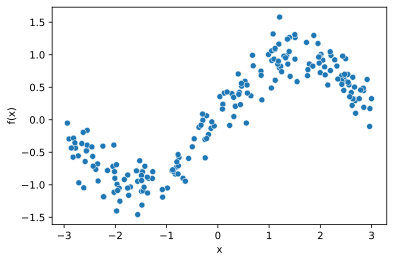

In [5]:
SIZE = 200

noise = np.random.normal(0, 0.2, size=SIZE)
x = np.random.uniform(-3, 3, size=SIZE)
y = np.sin(x)
df = pd.DataFrame(columns=['x', 'f(x)'])
df['x'] = x
df['f(x)'] = y + noise
sns.scatterplot(data=df, x = 'x', y = 'f(x)')
plt.show()

In [3]:
model = SimpleTreeBoostRegressor(n_estimators=30, metric=mse, derivative=error, max_depth=4, colsample_bytree=1.0, criterion='entropy', subsample=0.99, minimize=True, debug=False, lr=0.1)
model.fit(df, target='f(x)')
model.predict(df, predict_col='pred')

Iteration: 0, Loss: 0.5801832207150626



AttributeError: 'NoneType' object has no attribute 'feature'

<AxesSubplot:xlabel='x', ylabel='pred'>

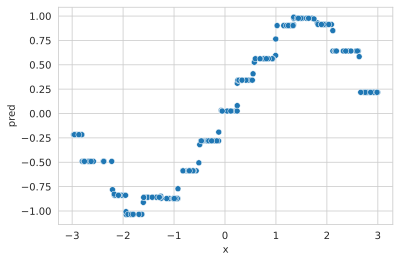

In [14]:
sns.scatterplot(data = df, x = 'x', y = 'pred')

In [15]:
# from Trees.Tree import TreeRegressor
# model = TreeRegressor(max_depth=10, metric=mse, criterion='entropy', minimize=True)
# model.trivial_fit(df, target='f(x)')
# model.predict(df, 'pred f(x)')


### Real dataset

In [17]:
dataset = sns.load_dataset("penguins")
dataset = dataset[dataset['body_mass_g'] != np.nan]
dataset = dataset.drop(['island', 'sex', 'species'], axis=1)
dataset = dataset.fillna(0)
train, test = train_test_split(dataset, train_size=0.8, shuffle=True, random_state=42)
# test = test.drop('species', axis=1)
model = SimpleTreeBoostRegressor(n_estimators=50, metric=mse, derivative=error, max_depth=4, colsample_bytree=0.7, criterion='entropy', subsample=0.7, minimize=True, debug=False, lr=0.2)

model.fit(train, target='body_mass_g')
model.predict(test, predict_col='pred')


Iteration: 0, Loss: 586003.0725723141

Iteration: 1, Loss: 457415.0070676164

Iteration: 2, Loss: 396612.8587534635

Iteration: 3, Loss: 303546.032082648

Iteration: 4, Loss: 247842.7225263718

Iteration: 5, Loss: 155959.56443071822

Iteration: 6, Loss: 189309.06645683394

Iteration: 7, Loss: 112194.72790786198

Iteration: 8, Loss: 157697.06041763083

Iteration: 9, Loss: 140674.40458078647

Iteration: 10, Loss: 129764.47886189655

Iteration: 11, Loss: 125360.18401937127

Iteration: 12, Loss: 116263.10651055236

Iteration: 13, Loss: 120232.02257636572

Iteration: 14, Loss: 75061.52311765526

Iteration: 15, Loss: 110562.80078037782

Iteration: 16, Loss: 115331.23475142033

Iteration: 17, Loss: 105572.44886561752

Iteration: 18, Loss: 78046.1766091063

Iteration: 19, Loss: 80144.45286025845

Iteration: 20, Loss: 103658.59076769905

Iteration: 21, Loss: 108893.65090559224

Iteration: 22, Loss: 68958.82127682526

Iteration: 23, Loss: 103644.87323548332

Iteration: 24, Loss: 104691.206508876

In [18]:
test

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,pred
194,50.9,19.1,196.0,3550.0,3859.382511
157,45.2,17.8,198.0,3950.0,3750.834189
225,46.5,13.5,210.0,4550.0,4311.249719
208,45.2,16.6,191.0,3250.0,3442.636621
318,48.4,14.4,203.0,4625.0,4313.408893
...,...,...,...,...,...
321,55.9,17.0,228.0,5600.0,5729.878980
172,42.4,17.3,181.0,3600.0,3566.424051
73,45.8,18.9,197.0,4150.0,3755.303439
76,40.9,16.8,191.0,3700.0,3243.944286


In [19]:
from metrics import me

me(test['pred'], test['body_mass_g'])

344.1944696544786

In [20]:
np.std(test['body_mass_g'])

933.354712150505